### NLTK Download

In [1]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [2]:
from nltk.tokenize import word_tokenize

text = "Gender-based violence is a serious issue."
tokens = word_tokenize(text)
print(tokens)


['Gender-based', 'violence', 'is', 'a', 'serious', 'issue', '.']


In [6]:
!pip install nltk


In [15]:
!{sys.executable} -m pip install --force-reinstall nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp312-cp312-win_amd64.whl (273 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: regex
    Found existing installation: regex 2024.11.6
    Uninstalling regex-2024.11.6:
      Successfully uninstalled regex-2024.11.6
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully 

  You can safely remove it manually.


In [16]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
!{sys.executable} -m pip show nltk


Name: nltk
Version: 3.9.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: C:\Users\User\anaconda3\Lib\site-packages
Requires: click, joblib, regex, tqdm
Required-by: 


In [10]:
import sys
print(sys.executable)


C:\Users\User\anaconda3\python.exe


In [11]:
!{sys.executable} -m pip install nltk

In [12]:
import nltk
nltk.download('punkt')

ModuleNotFoundError: No module named 'nltk'

## Gender Based Violence - Tweet classification challenge 

This challenge aims to classify tweets about GBV without using keywords.

Are you able to develop a machine learning model that can classify a tweet about gender-based violence into either of the five categories:
- Sexual violence
- Emotional violence
- Economic violence
- Physical violence
- Harmful traditional practice


### Install modules/package

In [2]:
#natural language toolkit
!pip install -U nltk 

### import libraries/modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### load the dataset

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
train.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [4]:
test = pd.read_csv("Test.csv")

In [5]:
test.head()

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."


### EDA

In [6]:
train.shape # the training dataset has 39650 rows

(39650, 3)

In [5]:
train["type"].unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

<Axes: xlabel='count', ylabel='type'>

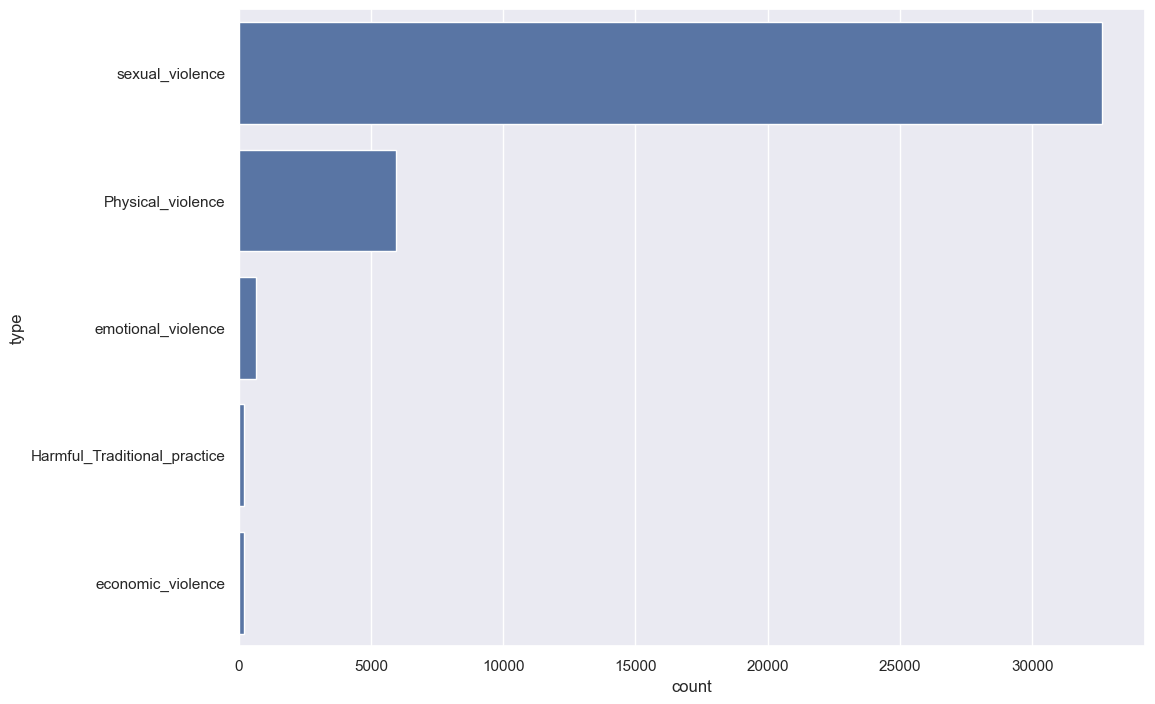

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(train["type"])

This dataset is highly imbalanced; from the graphs above, sexual violence is about 80%+. 

In [9]:
test.shape # the test dataset has 15581 rows

(15581, 2)

# Cleaning the data
Train dataset

In [6]:
import re
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning
train['clean_tweet'] = train['tweet'].apply(clean_tweet)

# Preview results
train[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,Had a dream i got raped last night. By a guy i...,had a dream i got raped last night by a guy i ...
1,he thought the word raped means sex and told m...,he thought the word raped means sex and told m...
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,she not talking to me i was raped by men moles...
3,I was sexually abused for 3 years at age 4 to ...,i was sexually abused for years at age to no o...
4,Chessy Prout can do better by telling the trut...,chessy prout can do better by telling the trut...


In [7]:
print (train.head())

      Tweet_ID                                              tweet  \
0  ID_0022DWKP  Had a dream i got raped last night. By a guy i...   
1  ID_00395QYM  he thought the word raped means sex and told m...   
2  ID_003EOSSF  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...   
3  ID_004BBHOD  I was sexually abused for 3 years at age 4 to ...   
4  ID_004F7516  Chessy Prout can do better by telling the trut...   

              type                                        clean_tweet  
0  sexual_violence  had a dream i got raped last night by a guy i ...  
1  sexual_violence  he thought the word raped means sex and told m...  
2  sexual_violence  she not talking to me i was raped by men moles...  
3  sexual_violence  i was sexually abused for years at age to no o...  
4  sexual_violence  chessy prout can do better by telling the trut...  


# Down sampling

In [8]:
from sklearn.utils import resample
df_majority = train[train['type'].isin(['sexual_violence', 'Physical_violence', 'emotional_violence', 'economic_violence'])]
df_minority = train[train['type'] == 'Harmful_Traditional_practice']

# Downsample majority classes to 188 instances each
downsampled_train = pd.concat([
    resample(train[train['type'] == 'sexual_violence'], 
             replace=False, n_samples=188, random_state=42),
    resample(train[train['type'] == 'Physical_violence'], 
             replace=False, n_samples=188, random_state=42),
    resample(train[train['type'] == 'emotional_violence'], 
             replace=False, n_samples=188, random_state=42),
    resample(train[train['type'] == 'economic_violence'], 
             replace=False, n_samples=188, random_state=42),
    df_minority
])

# Check the new class distribution
print(downsampled_train['type'].value_counts())

type
sexual_violence                 188
Physical_violence               188
emotional_violence              188
economic_violence               188
Harmful_Traditional_practice    188
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='type'>

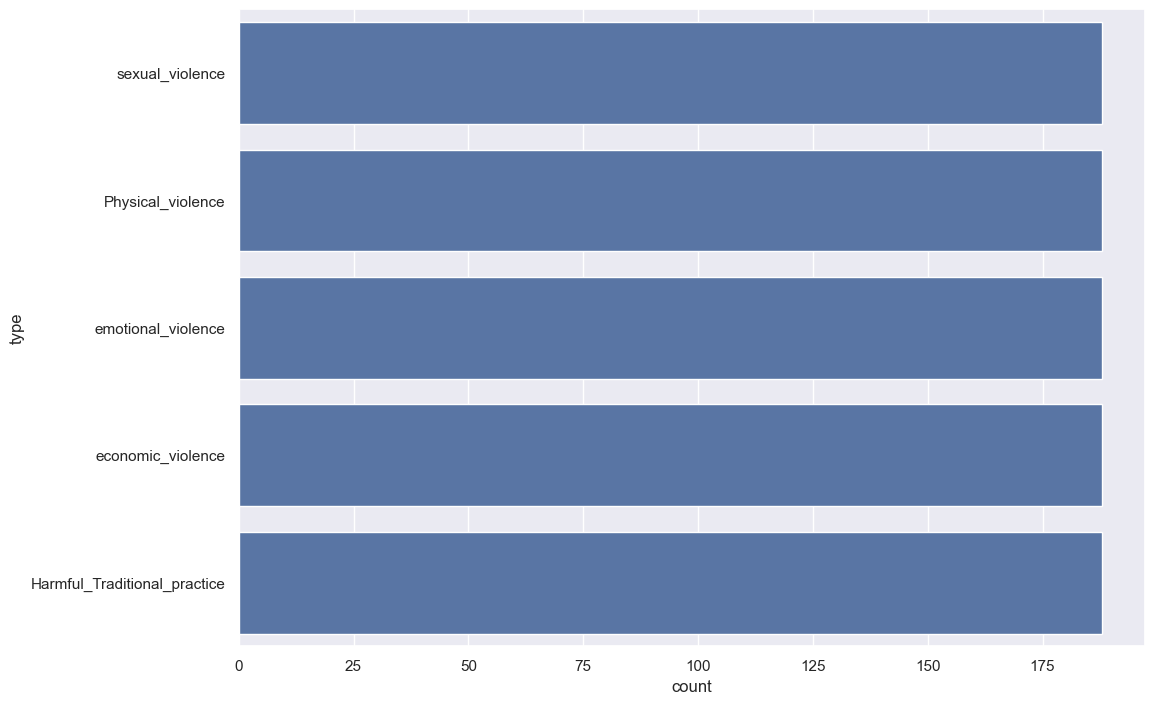

In [11]:
sns.countplot(downsampled_train['type'])

In [22]:
print (downsampled_train.head())

          Tweet_ID                                              tweet  \
35209  ID_W28ZPDFS  My cousin was raped by this guy Matthew. She w...   
38191  ID_YR9BJCD3  HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...   
20925  ID_J292XLBV  I remember how I almost got raped like it was ...   
16674  ID_F5A13OB7                                      He raped me 👈   
29906  ID_R7LRQQIE  A woman raped by A male: psychological horror,...   

                  type                                        clean_tweet  
35209  sexual_violence  my cousin was raped by this guy matthew she wa...  
38191  sexual_violence  hahahahahahahha i didnt see it the first time ...  
20925  sexual_violence  i remember how i almost got raped like it was ...  
16674  sexual_violence                                        he raped me  
29906  sexual_violence  a woman raped by a male psychological horror p...  


# Tokenization

In [ ]:
#import nltk
#nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


In [9]:
# Tokenize the clean_tweet column
from nltk.tokenize import word_tokenize
downsampled_train['tokens'] = downsampled_train['clean_tweet'].apply(word_tokenize)

In [10]:
print (downsampled_train.head())

          Tweet_ID                                              tweet  \
35209  ID_W28ZPDFS  My cousin was raped by this guy Matthew. She w...   
38191  ID_YR9BJCD3  HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...   
20925  ID_J292XLBV  I remember how I almost got raped like it was ...   
16674  ID_F5A13OB7                                      He raped me 👈   
29906  ID_R7LRQQIE  A woman raped by A male: psychological horror,...   

                  type                                        clean_tweet  \
35209  sexual_violence  my cousin was raped by this guy matthew she wa...   
38191  sexual_violence  hahahahahahahha i didnt see it the first time ...   
20925  sexual_violence  i remember how i almost got raped like it was ...   
16674  sexual_violence                                        he raped me   
29906  sexual_violence  a woman raped by a male psychological horror p...   

                                                  tokens  
35209  [my, cousin, was, raped, by, thi


## **Convert to TF-IDF Features:**

Join tokens back into text for vectorization.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back to text
downsampled_train['processed_text'] = downsampled_train['tokens'].apply(lambda x: ' '.join(x))

# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(downsampled_train['processed_text'])

# Get the target variable
y_train = downsampled_train['type']

In [45]:
print (X_train)

  (0, 2896)	0.2267453585196774
  (0, 730)	0.2125150026440184
  (0, 1812)	0.19124183259486308
  (0, 3468)	0.19828464676835938
  (0, 4002)	0.1278297936226956
  (0, 1544)	0.251072312569066
  (0, 2187)	0.2267453585196774
  (0, 2888)	0.251072312569066
  (0, 1499)	0.251072312569066
  (0, 3732)	0.23684195669340696
  (0, 4305)	0.17395769271897082
  (0, 3300)	0.23684195669340696
  (0, 4191)	0.2267453585196774
  (0, 2453)	0.4736839133868139
  (0, 1744)	0.31443877235436624
  (0, 3178)	0.09161913076166947
  (0, 891)	0.2125150026440184
  (1, 3345)	0.32443990134936657
  (1, 1782)	0.2746154913999891
  (1, 2238)	0.28288416277933776
  (1, 1216)	0.2746154913999891
  (1, 1660)	0.32443990134936657
  (1, 1349)	0.23954968123436443
  (1, 1092)	0.32443990134936657
  (1, 1960)	0.30062510360802286
  :	:
  (938, 1955)	0.16960553719310228
  (938, 2138)	0.10456531551842489
  (938, 3949)	0.27630810289405844
  (938, 1458)	0.10769133628990595
  (938, 1174)	0.12487461149360861
  (939, 2271)	0.296109990658527
  (939, 3

In [24]:
feature_names = vectorizer.get_feature_names_out()
feature_names[1812]


'heard'

In [46]:
print(y_train)

35209                 sexual_violence
38191                 sexual_violence
20925                 sexual_violence
16674                 sexual_violence
29906                 sexual_violence
                     ...             
38910    Harmful_Traditional_practice
39050    Harmful_Traditional_practice
39054    Harmful_Traditional_practice
39338    Harmful_Traditional_practice
39522    Harmful_Traditional_practice
Name: type, Length: 940, dtype: object


# Train the data
Remember this is the down sampled data


In [12]:
from sklearn.linear_model import LogisticRegression
# Train the model on the entire dataset
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Prepare the test data

In [11]:
test.head()

,Tweet_ID,tweet
0,ID_0095QL4S,"because he was my boyfriend, and if I said no,..."
1,ID_00DREW5O,"lol no, I'm telling you it's not legal. It's l..."
2,ID_00E9F5X9,Somalia's semi-autonomous Puntland region has ...
3,ID_00G9OSKZ,University of Cape Coast students being robbed...
4,ID_00HU96U6,"""Somebody came up behind him and stabbed him i..."


In [13]:
# Apply cleaning
test['clean_tweet'] = test['tweet'].apply(clean_tweet)

# Preview results
test[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,"because he was my boyfriend, and if I said no,...",because he was my boyfriend and if i said no h...
1,"lol no, I'm telling you it's not legal. It's l...",lol no im telling you its not legal its litera...
2,Somalia's semi-autonomous Puntland region has ...,somalias semiautonomous puntland region has ta...
3,University of Cape Coast students being robbed...,university of cape coast students being robbed...
4,"""Somebody came up behind him and stabbed him i...",somebody came up behind him and stabbed him in...


# Test tokenization

In [14]:
test['tokens'] = test['clean_tweet'].apply(word_tokenize)
test['processed_text'] = test['tokens'].apply(lambda x: ' '.join(x))

In [14]:
print (test.head())

      Tweet_ID                                              tweet  \
0  ID_0095QL4S  because he was my boyfriend, and if I said no,...   
1  ID_00DREW5O  lol no, I'm telling you it's not legal. It's l...   
2  ID_00E9F5X9  Somalia's semi-autonomous Puntland region has ...   
3  ID_00G9OSKZ  University of Cape Coast students being robbed...   
4  ID_00HU96U6  "Somebody came up behind him and stabbed him i...   

                                         clean_tweet  \
0  because he was my boyfriend and if i said no h...   
1  lol no im telling you its not legal its litera...   
2  somalias semiautonomous puntland region has ta...   
3  university of cape coast students being robbed...   
4  somebody came up behind him and stabbed him in...   

                                              tokens  \
0  [because, he, was, my, boyfriend, and, if, i, ...   
1  [lol, no, im, telling, you, its, not, legal, i...   
2  [somalias, semiautonomous, puntland, region, h...   
3  [university, of, cape

Vectorize Test Data

In [15]:
# Vectorize test data (use transform, not fit_transform)
X_test = vectorizer.transform(test['processed_text'])

In [36]:
print(X_test)

  (0, 4384)	0.32086634769106687
  (0, 4208)	0.31574269610554767
  (0, 3508)	0.47846923381906165
  (0, 3390)	0.21625788897567014
  (0, 2384)	0.35655856149631565
  (0, 1796)	0.36729453839796844
  (0, 1540)	0.17966665241620022
  (0, 496)	0.32647867300720046
  (0, 13)	0.34748142236312024
  (1, 3914)	0.18981497484710347
  (1, 3704)	0.25708049953018397
  (1, 3171)	0.23217139890068197
  (1, 2661)	0.21206091390342535
  (1, 2433)	0.24638620289444438
  (1, 2338)	0.19269140847623153
  (1, 2315)	0.19581826985016856
  (1, 2265)	0.2241524595896688
  (1, 2241)	0.20726229827117998
  (1, 1960)	0.11910503530150132
  (1, 1957)	0.2241524595896688
  (1, 1540)	0.10964693954065108
  (1, 1471)	0.15126844563098746
  (1, 1390)	0.2241524595896688
  (1, 1160)	0.160981662695845
  (1, 918)	0.25708049953018397
  :	:
  (15579, 617)	0.22836548090812908
  (15579, 496)	0.22410673694383695
  (15579, 358)	0.27277213955297946
  (15579, 292)	0.28916131600210254
  (15580, 4422)	0.22833372896880358
  (15580, 4416)	0.178652045

Predict the type labels for the test data.

In [16]:
# Predict using the trained model
y_pred = model.predict(X_test)

## Submission File

In [40]:

# Load sample submission file (adjust path as needed)
sample_submission_4 = pd.read_csv("SampleSubmission.csv")  # Use raw string for Windows path

# Create submission DataFrame
submission_4 = pd.DataFrame({
    'Tweet_ID': sample_submission_4['Tweet_ID'],  # Use Tweet_ID from sample_submission
    'type': y_pred
})

# Save to CSV
submission_4.to_csv('submission_4.csv', index=False)
print("Submission file saved as 'submission_4.csv'")

Submission file saved as 'submission_4.csv'


In [41]:
print(f"Length of y_pred: {len(y_pred)}")
print(f"Length of sample_submission_4: {len(sample_submission_4)}")

Length of y_pred: 15581
Length of sample_submission_4: 15581


In [42]:
print(submission_4.head())

      Tweet_ID                          type
0  ID_0095QL4S               sexual_violence
1  ID_00DREW5O  Harmful_Traditional_practice
2  ID_00E9F5X9  Harmful_Traditional_practice
3  ID_00G9OSKZ               sexual_violence
4  ID_00HU96U6               sexual_violence


### THE END

### Submission 5

In [50]:
# Load sample submission file (adjust path as needed)
sample_submission_5 = pd.read_csv("SampleSubmission.csv")  # Use raw string for Windows path

# Create submission DataFrame
submission_5 = pd.DataFrame({
    'Tweet_ID': sample_submission_5['Tweet_ID'],  # Use Tweet_ID from sample_submission
    'type': y_pred
})

# Save to CSV
submission_4.to_csv('submission_5.csv', index=False)
print("Submission file saved as 'submission_5.csv'")
print ("\n ---------------------------------------------------------------------------------\n")

print(f"Length of y_pred: {len(y_pred)}")
print(f"Length of sample_submission_5: {len(sample_submission_5)}")

print ("\n ---------------------------------------------------------------------------------\n")

print(submission_5.head())

Submission file saved as 'submission_5.csv'

 ---------------------------------------------------------------------------------

Length of y_pred: 15581
Length of sample_submission_5: 15581

 ---------------------------------------------------------------------------------

      Tweet_ID                          type
0  ID_0095QL4S               sexual_violence
1  ID_00DREW5O  Harmful_Traditional_practice
2  ID_00E9F5X9  Harmful_Traditional_practice
3  ID_00G9OSKZ               sexual_violence
4  ID_00HU96U6               sexual_violence


### Train with MultinomialNB
Let’s retrain using MultinomialNB on your entire downsampled_train dataset.

In [15]:
# Train MultinomialNB
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

#### Predict the test data
> Data has already been cleaned, tokenised and vector trnsformed.

In [17]:
# Predict on test data (using the same preprocessing as before)
y_pred_nb = nb_model.predict(X_test)

In [18]:
# Create submission
sample_submission_6 = pd.read_csv("SampleSubmission.csv")
submission_nb = pd.DataFrame({
    'Tweet_ID': sample_submission_6['Tweet_ID'],
    'type': y_pred_nb
})
submission_nb.to_csv('submission_nb.csv', index=False)
print("MultinomialNB submission saved as 'submission_nb.csv'")

MultinomialNB submission saved as 'submission_nb.csv'


### Hyperparameter Tuning
Tune MultinomialNB parameters (e.g., alpha for Laplace smoothing) using GridSearchCV.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")



Best alpha: 2.0
Best cross-validation score: 0.99


In [21]:
# Retrain with best alpha
best_nb_model = MultinomialNB(alpha=grid_search.best_params_['alpha'])
best_nb_model.fit(X_train, y_train)


MultinomialNB(alpha=2.0)

In [22]:
y_pred_best = best_nb_model.predict(X_test)
print (y_pred_best)

['economic_violence' 'Harmful_Traditional_practice'
 'Harmful_Traditional_practice' ... 'Harmful_Traditional_practice'
 'sexual_violence' 'sexual_violence']


#### Submission

In [23]:
# Update submission
sample_submission_7 = pd.read_csv("SampleSubmission.csv")
submission_best = pd.DataFrame({
    'Tweet_ID': sample_submission_7['Tweet_ID'],
    'type': y_pred_best
})
submission_best.to_csv('submission_best_nb.csv', index=False)
print("Tuned MultinomialNB submission saved as 'submission_best_nb.csv'")

Tuned MultinomialNB submission saved as 'submission_best_nb.csv'


### Feature Engineering
Experiment with n-grams to capture more context.

In [24]:
# Refit vectorizer with n-grams
vectorizer_ngram = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_ngram = vectorizer_ngram.fit_transform(downsampled_train['processed_text'])
X_test_ngram = vectorizer_ngram.transform(test['processed_text'])



In [25]:
# Train and predict with tuned MultinomialNB
best_nb_model.fit(X_train_ngram, y_train)




MultinomialNB(alpha=2.0)

In [26]:
y_pred_ngram = best_nb_model.predict(X_test_ngram)

In [27]:
# Create submission with n-grams
sample_submission_8 = pd.read_csv("SampleSubmission.csv")
submission_ngram = pd.DataFrame({
    'Tweet_ID': sample_submission_8['Tweet_ID'],
    'type': y_pred_ngram
})
submission_ngram.to_csv('submission_ngram_nb.csv', index=False)
print("N-gram MultinomialNB submission saved as 'submission_ngram_nb.csv'")

N-gram MultinomialNB submission saved as 'submission_ngram_nb.csv'


### Refine N-Gram Settings
Experiment with different ngram_range values (e.g., (1, 3) for trigrams) or adjust max_features (e.g., 3000 or 7000) to capture more or fewer features.

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Refit vectorizer with n-grams (1, 3)
vectorizer_ngram = TfidfVectorizer(max_features=7000, stop_words='english', ngram_range=(1, 3))
X_train_ngram = vectorizer_ngram.fit_transform(downsampled_train['processed_text'])
X_test_ngram = vectorizer_ngram.transform(test['processed_text'])

# Tune MultinomialNB with n-grams
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
grid_search_ngram = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search_ngram.fit(X_train_ngram, y_train)



GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [21]:
print(f"Best alpha with n-grams (1, 3): {grid_search_ngram.best_params_['alpha']}")
print(f"Best CV score with n-grams (1, 3): {grid_search_ngram.best_score_:.2f}")



Best alpha with n-grams (1, 3): 1.5
Best CV score with n-grams (1, 3): 0.99


In [25]:
# Train the best model with n-grams
best_nb_model_ngram = MultinomialNB(alpha=grid_search_ngram.best_params_['alpha'])
best_nb_model_ngram.fit(X_train_ngram, y_train)



MultinomialNB(alpha=1.5)

In [26]:
# Predict with the tuned n-gram model
y_pred_ngram = best_nb_model_ngram.predict(X_test_ngram)



#### Submission

In [37]:
# Create submission with n-grams
sample_submission_9 = pd.read_csv("SampleSubmission.csv")
submission_ngram = pd.DataFrame({
    'Tweet_ID': sample_submission_9['Tweet_ID'],
    'type': y_pred_ngram
})
submission_ngram.to_csv('submission_ngram_1_3_nb.csv', index=False)
print("N-gram (1, 3) MultinomialNB submission saved as 'submission_ngram_1_3_nb.csv'")

N-gram (1, 3) MultinomialNB submission saved as 'submission_ngram_1_3_nb.csv'


### Ensemble Approach
Combine predictions from LogisticRegression and MultinomialNB to leverage their strengths.

In [22]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_ngram, y_train)




LogisticRegression(max_iter=1000)

In [23]:
y_pred_lr = lr_model.predict(X_test_ngram)  # Use n-gram features for consistency

In [27]:
# Simple voting ensemble
y_pred_ensemble = []
for lr_pred, nb_pred in zip(y_pred_lr, y_pred_ngram):
    y_pred_ensemble.append(lr_pred if lr_pred == nb_pred else nb_pred)  # Majority vote



#### Submission

In [44]:
sample_submission_10 = pd.read_csv("SampleSubmission.csv")
submission_ensemble = pd.DataFrame({
    'Tweet_ID': sample_submission_10['Tweet_ID'],
    'type': y_pred_ensemble
})
submission_ensemble.to_csv('submission_ensemble.csv', index=False)
print("Ensemble submission saved as 'submission_ensemble.csv'")

Ensemble submission saved as 'submission_ensemble.csv'


#### Submission

In [ ]:
submission_ngram = pd.DataFrame({
    'Tweet_ID': sample_submission['Tweet_ID'],
    'type': y_pred_ngram
})
submission_ngram.to_csv('submission_ngram_1_3_nb.csv', index=False)
print("N-gram (1,3) MultinomialNB submission saved as 'submission_ngram_1_3_nb.csv'")

### Create models

Before we develop our models, we can set aside some validation dataset for inference purposes. We'll use scikit learn train test split module.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
X = train.drop(["type"], axis=1)
y = train["type"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CountVectorizer -converts text files/data into numerical feature vectors. You can find more information on CountVectorizer  here  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [16]:
vectorizer = CountVectorizer()

# fit_transform our tweets values to numerical vectors
x_train_counts = vectorizer.fit_transform(X_train["tweet"])
x_train_counts

<26565x30352 sparse matrix of type '<class 'numpy.int64'>'
	with 824624 stored elements in Compressed Sparse Row format>

In [18]:
print(vectorizer.get_feature_names_out())

['00' '000' '00006' ... '𝙻𝚊𝚜𝚝' '𝚂𝚝𝚊𝚛' '𝚙𝚘𝚟']


Using the CountVectorizer is effective, but this might give more preference to longer tweets than others. Let's try using frequencies. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [19]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

(26565, 30352)

Multiple algorithms are used for text classification; let’s look at:-

### 1. Naive Bayes MultinomialNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [20]:
# train.type.values our y values
clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB())])
clf = clf.fit(X_train["tweet"], y_train)

### evaluation metric
The evaluation metric on the Zindi leaderboard is accuracy; let’s test our simple model,

In [17]:
predicted = clf.predict(X_test.tweet)

In [18]:
predicted

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'Physical_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [19]:
np.unique(predicted)

array(['Physical_violence', 'emotional_violence', 'sexual_violence'],
      dtype='<U28')

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted)

NameError: name 'y_test' is not defined

- Our simple model gave us an accuracy score of 88%, fair enough, but you should also be careful that the data is highly imbalanced, as discussed earlier. 

- Question? Is the imbalance percentage the same as in the test? Can you think of various ways to deal with the imbalance dataset

- We can also see the only 3 categories(i.e 'Physical_violence', 'emotional_violence', 'sexual_violence') were predicted yet we have 5 categories. Therefore 88% might not be that good.


### submission

In [39]:
sample_submission = pd.read_csv("Sample_submission.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Sample_submission.csv'

In [38]:
sample_submission.head()

NameError: name 'sample_submission' is not defined

In [23]:
##let's prdict on the test data
test_predict = clf.predict(test.tweet)

In [24]:
test_predict

array(['sexual_violence', 'sexual_violence', 'sexual_violence', ...,
       'sexual_violence', 'sexual_violence', 'sexual_violence'],
      dtype='<U28')

In [25]:
np.unique(test_predict)

array(['Physical_violence', 'sexual_violence'], dtype='<U28')

In [26]:
sample_submission["type"] = test_predict

In [27]:
sample_submission.to_csv('baseline_sub.csv', index=False)

### To do,
- Do more analysis
- Try working on ways to balance the dataset, undersampling, oversampling, using SMOTE, etc
- You can try other text classification models, e.g., using nltk, etc.
